# Assignment 5: 

## Question 2: Agglomerative Clustering

### data pre-processing

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
football_df=pd.read_csv("football_data.csv")

In [4]:
football_df=football_df.drop("ID",axis=1)
football_df=football_df.drop("Unnamed: 0",axis=1)
football_df=football_df.drop("Name",axis=1)
football_df=football_df.drop("Jersey Number",axis=1)
football_df=football_df.drop("Unnamed: 60",axis=1)

In [5]:
football_df=football_df.drop("Joined",axis=1)
football_df=football_df.drop("Loaned From",axis=1)

In [6]:

football_df['nation_no']=football_df['Nationality'].astype('category').cat.codes
football_df['club_no']=football_df['Club'].astype('category').cat.codes
football_df['position_no']=football_df['Position'].astype('category').cat.codes

In [7]:
football_df=football_df.drop("Nationality",axis=1)
football_df=football_df.drop("Club",axis=1)
football_df=football_df.drop("Position",axis=1)

In [8]:
football_df['Value']=football_df['Value'].str.replace('€','')
football_df['Value']=football_df['Value'].str.replace('.','')
football_df['Value']=football_df['Value'].str.replace('M','000000')
football_df['Value']=football_df['Value'].str.replace('K','000')
football_df=football_df[football_df['Value'].str.contains('[a-zA-Z]')==False]
football_df['Value']=pd.to_numeric(football_df['Value'])

/tmp/ipykernel_23632/2667930555.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  football_df['Value']=football_df['Value'].str.replace('.','')


In [9]:
football_df['Wage']=football_df['Wage'].str.replace('€','')
football_df['Wage']=football_df['Wage'].str.replace('K','000')
football_df=football_df[football_df['Wage'].str.contains('[a-zA-Z]')==False]
football_df['Wage']=pd.to_numeric(football_df['Wage'])

In [10]:
football_df=football_df.drop("Special",axis=1)
football_df=football_df.drop("Contract Valid Until",axis=1)
football_df=football_df.drop("Body Type",axis=1)

In [11]:
football_df['Height']=football_df['Height'].str.replace("'",".")
football_df['Height']=pd.to_numeric(football_df['Height'])
football_df['Weight']=football_df['Weight'].str.replace("lbs","")
football_df['Weight']=pd.to_numeric(football_df['Weight'])
football_df['Preferred Foot']=football_df['Preferred Foot'].astype('category').cat.codes

In [12]:
football_df['International Reputation']=football_df['International Reputation'].astype('category').cat.codes

In [13]:
football_df=football_df.drop("Work Rate",axis=1)
football_df=football_df.drop("Release Clause",axis=1)
football_df=football_df.drop("Real Face",axis=1)
football_df['Crossing']=pd.to_numeric(football_df['Crossing'])

In [14]:
football_df=football_df.dropna()

In [15]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18131 entries, 0 to 18206
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18131 non-null  int64  
 1   Overall                   18131 non-null  int64  
 2   Potential                 18131 non-null  int64  
 3   Value                     18131 non-null  int64  
 4   Wage                      18131 non-null  int64  
 5   Preferred Foot            18131 non-null  int8   
 6   International Reputation  18131 non-null  int8   
 7   Weak Foot                 18131 non-null  float64
 8   Skill Moves               18131 non-null  float64
 9   Height                    18131 non-null  float64
 10  Weight                    18131 non-null  float64
 11  Crossing                  18131 non-null  float64
 12  Finishing                 18131 non-null  float64
 13  HeadingAccuracy           18131 non-null  float64
 14  ShortP

In [16]:
football_features=football_df[['Age','Overall','Value']]

### Agglomerative Clustering with different linkage methods

In [17]:

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [18]:
single_linkage=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='single')
single_linkage.fit_predict(football_features)
print("silhouette score for single linkage=",silhouette_score(football_features,single_linkage.labels_))


silhouette score for single linkage= 0.957461569804838


In [19]:
complete_linkage=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='complete')
complete_linkage.fit_predict(football_features)
print("silhouette score for complete linkage=",silhouette_score(football_features,complete_linkage.labels_))

silhouette score for complete linkage= 0.8937463438344339


In [20]:
average_linkage=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='average')
average_linkage.fit_predict(football_features)
print("silhouette score for average linkage=",silhouette_score(football_features,average_linkage.labels_))

silhouette score for average linkage= 0.8890134893370335


In [21]:
ward_linkage=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
ward_linkage.fit_predict(football_features)
print("silhouette score for ward linkage=",silhouette_score(football_features,ward_linkage.labels_))

silhouette score for ward linkage= 0.794483884827994


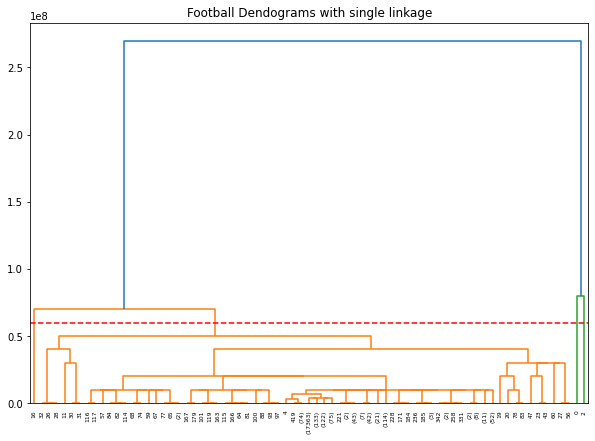

In [22]:
# plot dendrogram of single linkage
plt.figure(figsize=(10, 7))
plt.title("Football Dendograms with single linkage")
dend = shc.dendrogram(shc.linkage(football_features, method='single'),truncate_mode='level',p=10)
plt.axhline(y=60000000, color='r', linestyle='--')
plt.show()

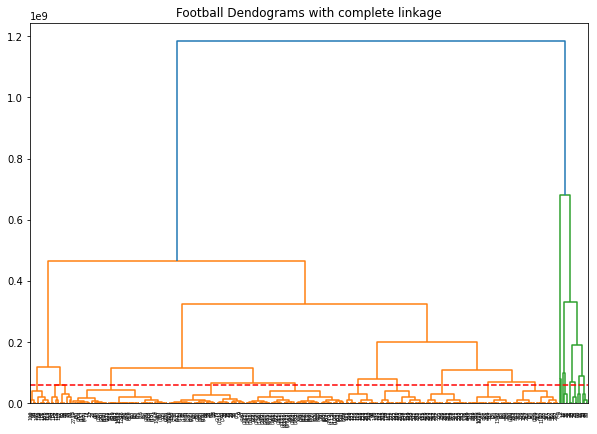

In [23]:
# plot dendrogram of complete linkage
plt.figure(figsize=(10, 7))
plt.title("Football Dendograms with complete linkage")
dend = shc.dendrogram(shc.linkage(football_features, method='complete'),truncate_mode='level',p=10)
plt.axhline(y=60000000, color='r', linestyle='--')
plt.show()


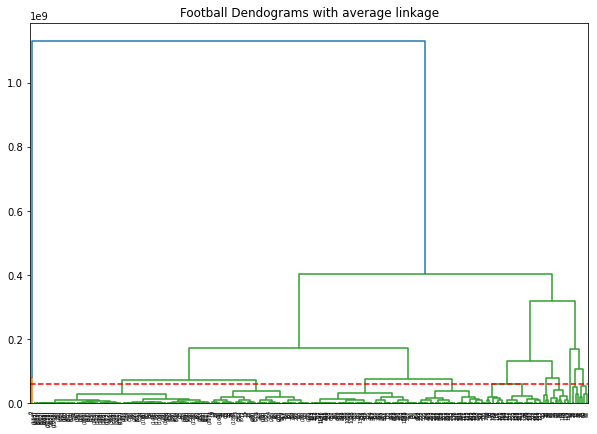

In [24]:
# plot dendrogram of average linkage
plt.figure(figsize=(10, 7))
plt.title("Football Dendograms with average linkage")
dend = shc.dendrogram(shc.linkage(football_features, method='average'),truncate_mode='level',p=10)
plt.axhline(y=60000000, color='r', linestyle='--')
plt.show()


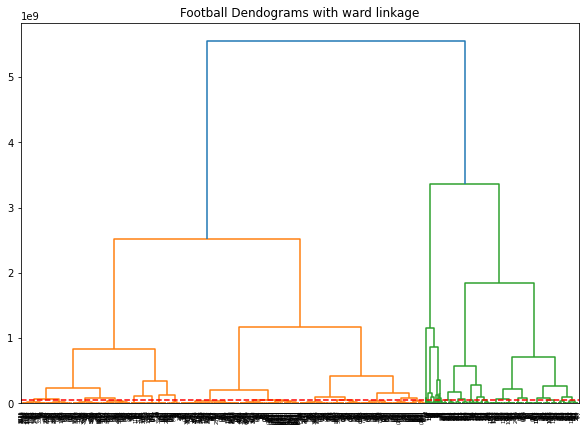

In [25]:
# plot dendrogram of ward linkage
plt.figure(figsize=(10, 7))
plt.title("Football Dendograms with ward linkage")
dend = shc.dendrogram(shc.linkage(football_features, method='ward'),truncate_mode='level',p=10)
plt.axhline(y=60000000, color='r', linestyle='--')
plt.show()


### Average intra-cluster distance and average inter-cluster distance

In [32]:
indices = [np.where(single_linkage.labels_ == i)[0] for i in range(6)]
intra_class_distance_single_linkage=football_features.iloc[indices[0]].mean(axis=0).mean(axis=0)
indices = [np.where(complete_linkage.labels_ == i)[0] for i in range(6)]
intra_class_distance_complete_linkage=football_features.iloc[indices[0]].mean(axis=0).mean(axis=0)
indices = [np.where(average_linkage.labels_ == i)[0] for i in range(6)]
intra_class_distance_average_linkage=football_features.iloc[indices[0]].mean(axis=0).mean(axis=0)
indices = [np.where(ward_linkage.labels_ == i)[0] for i in range(6)]
intra_class_distance_ward_linkage=football_features.iloc[indices[0]].mean(axis=0).mean(axis=0)
print("intra class distance for single linkage=",intra_class_distance_single_linkage)
print("intra class distance for complete linkage=",intra_class_distance_complete_linkage)
print("intra class distance for average linkage=",intra_class_distance_average_linkage)
print("intra class distance for ward linkage=",intra_class_distance_ward_linkage)


intra class distance for single linkage= 240000038.2222222
intra class distance for complete linkage= 62049418.10123456
intra class distance for average linkage= 119918069.38797814
intra class distance for ward linkage= 194798017.44444445


In [34]:
indices = [np.where(single_linkage.labels_ == i)[0] for i in range(6)]
inter_class_distance_singe_inkage=0
for i in range(6):
    for j in range(i+1,6):
        if i!=j:
            inter_class_distance_singe_inkage_new=np.abs(football_features.iloc[indices[i]].mean(axis=0).mean(axis=0)-football_features.iloc[indices[j]].mean(axis=0).mean(axis=0))
            inter_class_distance_singe_inkage=np.mean([inter_class_distance_singe_inkage,inter_class_distance_singe_inkage_new])
print("inter class distance for single linkage=",inter_class_distance_singe_inkage)

indices = [np.where(complete_linkage.labels_ == i)[0] for i in range(6)]
inter_class_distance_complete_inkage=0
for i in range(6):
    for j in range(i+1,6):
        if i!=j:
            inter_class_distance_complete_inkage_new=np.abs(football_features.iloc[indices[i]].mean(axis=0).mean(axis=0)-football_features.iloc[indices[j]].mean(axis=0).mean(axis=0))
            inter_class_distance_complete_inkage=np.mean([inter_class_distance_complete_inkage,inter_class_distance_complete_inkage_new])
print("inter class distance for complete linkage=",inter_class_distance_complete_inkage)

indices = [np.where(average_linkage.labels_ == i)[0] for i in range(6)]
inter_class_distance_average_inkage=0
for i in range(6):
    for j in range(i+1,6):
        if i!=j:
            inter_class_distance_average_inkage_new=np.abs(football_features.iloc[indices[i]].mean(axis=0).mean(axis=0)-football_features.iloc[indices[j]].mean(axis=0).mean(axis=0))
            inter_class_distance_average_inkage=np.mean([inter_class_distance_average_inkage,inter_class_distance_average_inkage_new])
print("inter class distance for average linkage=",inter_class_distance_average_inkage)

indices = [np.where(ward_linkage.labels_ == i)[0] for i in range(6)]
inter_class_distance_ward_inkage=0
for i in range(6):
    for j in range(i+1,6):
        if i!=j:
            inter_class_distance_ward_inkage_new=np.abs(football_features.iloc[indices[i]].mean(axis=0).mean(axis=0)-football_features.iloc[indices[j]].mean(axis=0).mean(axis=0))
            inter_class_distance_ward_inkage=np.mean([inter_class_distance_ward_inkage,inter_class_distance_ward_inkage_new])
print("inter class distance for ward linkage=",inter_class_distance_ward_inkage)

inter class distance for single linkage= 88210697.70086294
inter class distance for complete linkage= 175909593.77425453
inter class distance for average linkage= 232904067.5030635
inter class distance for ward linkage= 66284008.53438668


### distance matrix for single linkage

In [38]:
k=6
indices = [np.where(single_linkage.labels_ == i)[0] for i in range(k)]
distance_matrix=np.zeros((k,k))
for i in range(k):
    for j in range(k):
        if i!=j:
            distance_matrix[i,j]=np.abs(football_features.iloc[indices[i]].mean(axis=0).mean(axis=0)-football_features.iloc[indices[j]].mean(axis=0).mean(axis=0))
distance_matrix=distance_matrix/np.max(distance_matrix)

In [39]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5"]
for i in range(k):
    x.add_row(distance_matrix[i])
print(x)

+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+
|      Cluster 0      |     Cluster 1      |      Cluster 2      |      Cluster 3      |      Cluster 4      |      Cluster 5      |
+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+
|         0.0         | 0.6032558563490588 | 0.12542234322129162 | 0.39674414365094124 | 0.09811951727215691 |  0.3284870931405267 |
|  0.6032558563490588 |        0.0         |  0.4778335131277672 |         1.0         |  0.7013753736212157 |  0.9317429494895855 |
| 0.12542234322129162 | 0.4778335131277672 |         0.0         |  0.5221664868722329 |  0.2235418604934485 |  0.4539094363618183 |
| 0.39674414365094124 |        1.0         |  0.5221664868722329 |         0.0         | 0.29862462637878434 | 0.06825705051041456 |
| 0.09811951727215691 | 0.7013753736212157 |  0.2235418604934485 | 0.

### distance matrix for complete linkage

In [40]:
indices = [np.where(complete_linkage.labels_ == i)[0] for i in range(k)]
distance_matrix=np.zeros((k,k))
for i in range(k):
    for j in range(k):
        if i!=j:
            distance_matrix[i,j]=np.abs(football_features.iloc[indices[i]].mean(axis=0).mean(axis=0)-football_features.iloc[indices[j]].mean(axis=0).mean(axis=0))
distance_matrix=distance_matrix/np.max(distance_matrix)


In [41]:
x=PrettyTable()
x.field_names=["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5"]
for i in range(k):
    x.add_row(distance_matrix[i])
print(x)
    

+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+
|      Cluster 0      |      Cluster 1      |     Cluster 2      |      Cluster 3      |      Cluster 4      |      Cluster 5      |
+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+
|         0.0         |  0.3655621936755854 | 0.1553851234317555 | 0.18951554102121057 |  0.5120899762017634 |  0.8446148765682445 |
|  0.3655621936755854 |         0.0         | 0.5209473171073409 | 0.17604665265437483 | 0.14652778252617807 | 0.47905268289265907 |
|  0.1553851234317555 |  0.5209473171073409 |        0.0         |  0.3449006644529661 |  0.667475099633519  |         1.0         |
| 0.18951554102121057 | 0.17604665265437483 | 0.3449006644529661 |         0.0         |  0.3225744351805529 |  0.6550993355470339 |
|  0.5120899762017634 | 0.14652778252617807 | 0.667475099633519  |  0

### distance matrix for average linkage

In [42]:
indices = [np.where(average_linkage.labels_ == i)[0] for i in range(k)]
distance_matrix=np.zeros((k,k))
for i in range(k):
    for j in range(k):
        if i!=j:
            distance_matrix[i,j]=np.abs(football_features.iloc[indices[i]].mean(axis=0).mean(axis=0)-football_features.iloc[indices[j]].mean(axis=0).mean(axis=0))
distance_matrix=distance_matrix/np.max(distance_matrix)


In [43]:
x=PrettyTable()
x.field_names=["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5"]
for i in range(k):
    x.add_row(distance_matrix[i])
print(x)


+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|      Cluster 0      |      Cluster 1      |      Cluster 2      |      Cluster 3      |      Cluster 4      |      Cluster 5      |
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|         0.0         |  0.2696882564542827 | 0.15513016946861713 |  0.6918848926781834 | 0.30811510732181663 |  0.4187420224402016 |
|  0.2696882564542827 |         0.0         |  0.4248184259228998 | 0.42219663622390075 |  0.5778033637760993 | 0.14905376598591893 |
| 0.15513016946861713 |  0.4248184259228998 |         0.0         |  0.8470150621468007 | 0.15298493785319953 |  0.5738721919088188 |
|  0.6918848926781834 | 0.42219663622390075 |  0.8470150621468007 |         0.0         |         1.0         | 0.27314287023798184 |
| 0.30811510732181663 |  0.5778033637760993 | 0.15298493785319

### distance matrix for centroid linkage

In [44]:
indices = [np.where(ward_linkage.labels_ == i)[0] for i in range(k)]
distance_matrix=np.zeros((k,k))
for i in range(k):
    for j in range(k):
        if i!=j:
            distance_matrix[i,j]=np.abs(football_features.iloc[indices[i]].mean(axis=0).mean(axis=0)-football_features.iloc[indices[j]].mean(axis=0).mean(axis=0))
distance_matrix=distance_matrix/np.max(distance_matrix)

In [45]:
x=PrettyTable()
x.field_names=["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5"]
for i in range(k):
    x.add_row(distance_matrix[i])
print(x)

+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|     Cluster 0      |      Cluster 1      |      Cluster 2      |      Cluster 3      |      Cluster 4      |      Cluster 5      |
+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|        0.0         |  0.9172406620313419 |  0.9725047544887597 |  0.7839675885942066 |  0.5327257816454499 |         1.0         |
| 0.9172406620313419 |         0.0         | 0.05526409245741791 | 0.13327307343713526 |  0.3845148803858919 | 0.08275933796865821 |
| 0.9725047544887597 | 0.05526409245741791 |         0.0         | 0.18853716589455313 | 0.43977897284330986 | 0.02749524551124031 |
| 0.7839675885942066 | 0.13327307343713526 | 0.18853716589455313 |         0.0         | 0.25124180694875664 |  0.2160324114057935 |
| 0.5327257816454499 |  0.3845148803858919 | 0.43977897284330986 | 0.